In [4]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import pandas_datareader as web
import quantstats as qs
from sklearn.decomposition import PCA
import seaborn as sns

## Section 1: Preparing Data

In [ ]:
mixed_stocks = [
    'NEE', 'ED', 'PEG', 'XEL', 'D', 'EXC', 'SRE',  'SO', 'DUK', 'JKS',
    'MSFT', 'SHOP', 'MSTR', 'CRM', 'AMD', 'DIOD', 'INTC', 'MRVL', 'ADI', 'AVGO', 'QCOM', 'NVDA',
    'ATOM', 'AMKR', 'VLO', 'MPC', 'XOM', 'WMB', 'EQT', 'SHEL', 'BP', 'TTE', 'OXY', 'CVX',
    'AMZN', 'IAC', 'GOOGL', 'META', 'IBM', 'NOW', 'DXC',  'WIT', 'TCS.NS', 'CTSH', 'ACN',
    'CVS', 'MRK', 'JNJ', 'UNH', 'NVO', 'LLY', 'KR', 'COST',  'TGT',  'WMT',
    'NFLX', 'DIS', 'TTWO', 'EA', 'ROKU', 'JBL', 'GLW', 'TEL', 'APH', 'CLS', 'ELTK', 'LYTS',
    'PFE', 'ABBV', 'BMY', 'AMGN', 'PYPL', 'ALLY', 'SYF', 'DFS', 'COF', 'AXP', 'MA', 'V',
    'AAPL', 'SONY',  'GPRO', 'LPL',  'IBKR', 'MARA', 'LPLA', 'RJF',  'MS',
    'SCHW', 'GS', 'JPM', 'BAC', 'TSLA',   'GM'
]
print(f'You have {len(mixed_stocks)} mixed _sector stocks in your portfolio:')

def get_stock_data(stocks, start_date, end_date):

  """Fetches historical stock data for a list of stocks."""
  data = yf.download(stocks, start=start_date, end=end_date)
  return data

covid_start_date = dt.datetime(2019, 12, 31) # approximate date- adjust as needed


start_date =  covid_start_date - dt.timedelta(days=2*365)
end_date =  dt.datetime.today()

stock_data = get_stock_data(mixed_stocks, start_date, end_date)
returns = stock_data.pct_change().dropna()

You have 94 mixed _sector stocks in your portfolio:


[*********************100%***********************]  94 of 94 completed


## Section 2: Preparing for PCA

In [8]:
# Calculate daily returns for each portfolio

def calculate_portfolio_returns(weights, returns):
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1 + portfolio_returns).cumprod() - 1
    return cumulative_returns

# Split the data into pre-COVID and post-COVID periods

returns_pre_covid = returns[returns.index < covid_start_date]
returns_post_covid = returns[returns.index >= covid_start_date]

def create_component_variance_table(explained_variance):
  """Creates a DataFrame with PCA components and cumulative variance."""
  cumulative_variance = np.cumsum(explained_variance)
  component_variance_df = pd.DataFrame({
      'Component': range(1, len(explained_variance) + 1),
      'Explained Variance': explained_variance,
      'Cumulative Explained Variance': cumulative_variance

  })
  # Concatenate the first 17 and the last 2 entries
  result_df = pd.concat([component_variance_df.head(7), component_variance_df.tail(2)])
  return result_df


def kaiser_rule_with_cutoff(explained_variance, cutoff=0.8):
  """Applies Kaiser's rule with a specified variance cutoff."""
  eigenvalues = explained_variance * len(explained_variance)
  kaiser_components = np.sum(eigenvalues > 1)
  # Calculate cumulative variance
  cumulative_variance = np.cumsum(explained_variance)
  cutoff_components = np.argmax(cumulative_variance >= cutoff) + 1
  return min(kaiser_components, cutoff_components)

## Section 3: Proper PCA

In [9]:
pca = PCA()
principalComponents = pca.fit_transform(returns)

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
num_components = kaiser_rule_with_cutoff(explained_variance, cutoff=0.8)
print(f"Number of components based on Kaiser's rule with 80% cutoff: {num_components}")
component_variance_table = create_component_variance_table(explained_variance)
print("Entire period PCA :\n")
print(component_variance_table)

pre_principalComponents = pca.fit_transform(returns_pre_covid)
pre_explained_variance = pca.explained_variance_ratio_
pre_component_variance_table = create_component_variance_table(pre_explained_variance)

print("Pre_covid PCA:\n")
print(pre_component_variance_table)

post_principalComponents = pca.fit_transform(returns_post_covid)
post_explained_variance = pca.explained_variance_ratio_
post_component_variance_table = create_component_variance_table(post_explained_variance)

print("Post_covid PCA:\n")
print(post_component_variance_table)


# Porject Code from Yuta

### Load required packages

### List of Tickers and Set ups

In [14]:
mixed_stocks = [
    'NEE', 'ED', 'PEG', 'XEL', 'D', 'EXC', 'SRE',  'SO', 'DUK', 'JKS',
    'MSFT', 'SHOP', 'MSTR', 'CRM', 'AMD', 'DIOD', 'INTC', 'MRVL', 'ADI', 'AVGO', 'QCOM', 'NVDA',
    'ATOM', 'AMKR', 'VLO', 'MPC', 'XOM', 'WMB', 'EQT', 'SHEL', 'BP', 'TTE', 'OXY', 'CVX',
    'AMZN', 'IAC', 'GOOGL', 'META', 'IBM', 'NOW', 'DXC',  'WIT', 'TCS.NS', 'CTSH', 'ACN',
    'CVS', 'MRK', 'JNJ', 'UNH', 'NVO', 'LLY', 'KR', 'COST',  'TGT',  'WMT',
    'NFLX', 'DIS', 'TTWO', 'EA', 'ROKU', 'JBL', 'GLW', 'TEL', 'APH', 'CLS', 'ELTK', 'LYTS',
    'PFE', 'ABBV', 'BMY', 'AMGN', 'PYPL', 'ALLY', 'SYF', 'DFS', 'COF', 'AXP', 'MA', 'V',
    'AAPL', 'SONY',  'GPRO', 'LPL',  'IBKR', 'MARA', 'LPLA', 'RJF',  'MS',
    'SCHW', 'GS', 'JPM', 'BAC', 'TSLA',   'GM'
]



# set ups
start_date = "2018-01-01"
end_date = "2022-12-31"

# fetch and and clean adjusted closing price
def get_stock_data(stocks):

  """Fetches historical stock data for a list of stocks."""
  start_date =  dt.datetime(2018, 1, 1)
  end_date =  dt.datetime.today()
  data = yf.download(stocks, start=start_date, end=end_date)
  return data


stock_data = get_stock_data(mixed_stocks)
returns = stock_data.pct_change().dropna()

returns

[*********************100%***********************]  94 of 94 completed


Price          Close                                                    \
Ticker          AAPL      ABBV       ACN       ADI      ALLY       AMD   
Date                                                                     
2018-01-03 -0.000174  0.015649  0.004615  0.012406 -0.004757  0.051913   
2018-01-04  0.004644 -0.005703  0.011841 -0.001094  0.014681  0.049351   
2018-01-05  0.011386  0.017408  0.008249  0.004052  0.016823 -0.019802   
2018-01-08 -0.003714 -0.016022  0.007991  0.001746 -0.012905  0.033670   
2018-01-09 -0.000115  0.007538  0.003335 -0.002069  0.018438 -0.037459   
...              ...       ...       ...       ...       ...       ...   
2025-05-09  0.005266 -0.005281 -0.003173  0.023326  0.033134  0.011209   
2025-05-12  0.063146  0.029632  0.046086  0.075370  0.051719  0.051342   
2025-05-13  0.010152 -0.010891  0.001366  0.015819  0.006868  0.040141   
2025-05-14 -0.002818 -0.056170 -0.006573  0.000618 -0.023738  0.046772   
2025-05-15 -0.004145  0.023895  0.008739  0.001323 -0.000838 -0.023191   

Price                                               ...    Volume            \
Ticker          AMGN      AMKR      AMZN       APH  ...       TTE      TTWO   
Date                                                ...                       
2018-01-03  0.018870 -0.002907  0.012775  0.012984  ...  1.172698 -0.075065   
2018-01-04 -0.004214  0.064140  0.004476 -0.003485  ...  0.180821 -0.091078   
2018-01-05  0.005958 -0.013699  0.016163  0.012185  ... -0.194225  0.147275   
2018-01-08 -0.000277 -0.010185  0.014425  0.010701  ...  0.247974  0.051401   
2018-01-09  0.015394 -0.019644  0.004676  0.001544  ...  0.293938  0.071258   
...              ...       ...       ...       ...  ...       ...       ...   
2025-05-09 -0.022753  0.008889  0.005102  0.003723  ...  0.367252 -0.140433   
2025-05-12  0.033476  0.080947  0.080700  0.044263  ...  0.386202  0.364268   
2025-05-13 -0.015686  0.021396  0.013085  0.015629  ...  0.528515  0.017595   
2025-05-14 -0.030209  0.001995 -0.005299 -0.001749  ... -0.662537  0.011102   
2025-05-15  0.035878 -0.008462 -0.024162  0.003971  ... -0.160240  0.350732   

Price                                                                   \
Ticker           UNH         V       VLO       WIT       WMB       WMT   
Date                                                                     
2018-01-03 -0.306284  0.142282 -0.146613 -0.100453  1.001986 -0.122841   
2018-01-04  0.137119  0.123695 -0.026361  0.067905 -0.186287 -0.232850   
2018-01-05 -0.115056  0.100598 -0.001075 -0.248572 -0.127682  0.066409   
2018-01-08  0.171818 -0.224644 -0.161544 -0.198165 -0.128905  0.214154   
2018-01-09 -0.062649 -0.014758  0.558073 -0.304236 -0.291706 -0.173136   
...              ...       ...       ...       ...       ...       ...   
2025-05-09  0.161091 -0.257386 -0.341126 -0.687843 -0.561890 -0.052783   
2025-05-12  0.313050  1.587119  0.908042  1.182590  0.683196  0.955343   
2025-05-13  4.404760 -0.322989 -0.179769 -0.469630  0.036305 -0.262740   
2025-05-14 -0.326988  0.148237 -0.135794 -0.251588 -0.229669  0.297437   
2025-05-15  1.962476 -0.222685 -0.373785  0.524977 -0.113074  0.716578   

Price                           
Ticker           XEL       XOM  
Date                            
2018-01-03  0.684088  0.216962  
2018-01-04 -0.317845 -0.221720  
2018-01-05  0.328108  0.016993  
2018-01-08  0.029399 -0.010907  
2018-01-09 -0.216620 -0.255832  
...              ...       ...  
2025-05-09 -0.215411 -0.427390  
2025-05-12  0.929456  0.295894  
2025-05-13  0.113803 -0.062747  
2025-05-14  0.001858  0.160597  
2025-05-15  0.241003 -0.269466  

[1903 rows x 470 columns]

In [22]:
success =  ["XOM","CVX","COP","EOG","SLB","LIN","APD","DD","SHW","ECL",
             "HON","GE","BA","CAT","MMM","AMZN","HD","DIS","MCD","SBUX",
             "PG","KO","PEP","WMT","MO","JNJ","UNH","PFE","MRK","ABT",
             "JPM","BAC","WFC","C","GS","AAPL","MSFT","NVDA","INTC","CSCO",
             "VZ","T","NFLX","CMCSA","DUK","NEE","SO","AEP","EXC",
             "PLD","EQIX","SPG","PSA","O"]


# Function to get and clean individual stock data
def get_clean_price(ticker):
    try:
        df = yf.download(ticker, start=start_date, end=end_date)['Close']
        df = df.ffill().bfill()  # Forward-fill then backward-fill
        return df
    except Exception as e:
        print(f"Failed to load {ticker}: {e}")
        return None

price_dict = {
    ticker: get_clean_price(ticker)
    for ticker in success
}

price_dict = {k: v for k, v in price_dict.items() if v is not None}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [23]:
combined_prices = pd.concat(price_dict.values(), axis=1, join='inner')
combined_prices.columns = list(price_dict.keys())

# Log returns
rets_all = np.log(combined_prices / combined_prices.shift(1)).dropna()
rets_all

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,XOM,CVX,COP,EOG,SLB,LIN,APD,DD,SHW,ECL,...,DUK,NEE,SO,AEP,EXC,PLD,EQIX,SPG,PSA,O
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.019450,0.007263,0.018270,0.014803,0.025703,0.008352,0.005422,0.015868,0.004005,0.006447,...,-0.003128,-0.021442,-0.005740,-0.008460,-0.013478,-0.001877,0.004599,-0.004651,0.002179,-0.002653
2018-01-04,0.001383,-0.003117,0.011471,0.000180,0.024511,0.015561,0.003839,0.018983,-0.005456,0.008093,...,-0.007865,-0.005152,-0.004273,-0.011909,-0.014181,-0.020238,-0.002297,-0.029687,-0.017860,-0.021840
2018-01-05,-0.000807,-0.001640,-0.001932,0.010936,0.006817,0.008713,0.008346,0.012945,0.020509,0.005189,...,-0.004627,0.004559,0.001712,-0.002116,-0.008344,-0.000799,0.003432,0.009261,-0.005876,-0.000725
2018-01-08,0.004486,0.004914,0.010145,0.004803,0.016173,-0.000372,0.001068,-0.003453,0.005534,-0.003505,...,0.003167,0.008206,0.008938,0.008719,0.010678,0.011601,0.019192,0.006520,0.007942,0.001267
2018-01-09,-0.004255,-0.005383,0.008146,-0.008912,0.001336,0.009685,0.002547,0.002392,0.000495,-0.000293,...,-0.011747,-0.007349,-0.012579,-0.011831,-0.011464,-0.010163,-0.004857,-0.022224,-0.011762,-0.018808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.026101,0.030447,0.042318,0.033556,0.030660,0.005084,-0.001793,0.017317,0.005662,0.010362,...,0.010149,0.009910,0.013755,0.012831,0.012156,0.003085,0.003961,0.013233,0.011435,0.015017
2022-12-27,0.013798,0.012492,0.012059,0.011192,0.009578,-0.001154,0.000513,0.000727,-0.013483,0.006276,...,0.006581,-0.002022,0.007361,0.006251,0.002552,-0.002909,-0.004725,0.001610,-0.000601,-0.004669
2022-12-28,-0.016563,-0.014862,-0.027036,-0.036076,-0.016966,-0.009285,-0.008234,-0.014351,-0.008136,-0.011409,...,-0.007455,-0.010050,-0.008616,-0.009705,-0.004879,-0.025388,-0.003121,-0.026078,-0.018003,-0.013822


In [24]:
from sklearn.preprocessing import StandardScaler

def rolling_zscore(returns_df, window=60, step=5):
    results = []
    dates = returns_df.index

    for start in range(0, len(returns_df) - window + 1, step):
        end = start + window
        window_data = returns_df.iloc[start:end].dropna()

        if len(window_data) < window * 0.8:
            continue  # Skip if too much missing data

        # Z-score normalization (row-wise standardization)
        scaler = StandardScaler()
        z_scores = scaler.fit_transform(window_data)

        results.append({
            'start_date': dates[start],
            'end_date': dates[end - 1],
            'data': z_scores
        })

    return results

# Apply function (equivalent to z_list in R)
z_list = rolling_zscore(rets_all, window=60, step=5)


In [25]:
k = 5
pca_results = []


for z in z_list:
    # Perform PCA on the windowed, standardized data
    pca = PCA().fit(z['data'])  # z['data'] should already be z-scored
    sdev = pca.singular_values_  # Singular values, like R's `pca$sdev`

    # Compute absorption ratio
    ar = sum(sdev[:k]**2) / sum(sdev**2)

    # Save result
    pca_results.append({
        'Date': z['end_date'],
        'AR': ar
    })

absorp_ratio = pd.DataFrame(pca_results)
absorp_ratio

,Date,AR
0,2018-03-29,0.714690
1,2018-04-06,0.730673
2,2018-04-13,0.738781
3,2018-04-20,0.738738
4,2018-04-27,0.739388
...,...,...
235,2022-11-28,0.728607
236,2022-12-05,0.729616
237,2022-12-12,0.717917
238,2022-12-19,0.711272


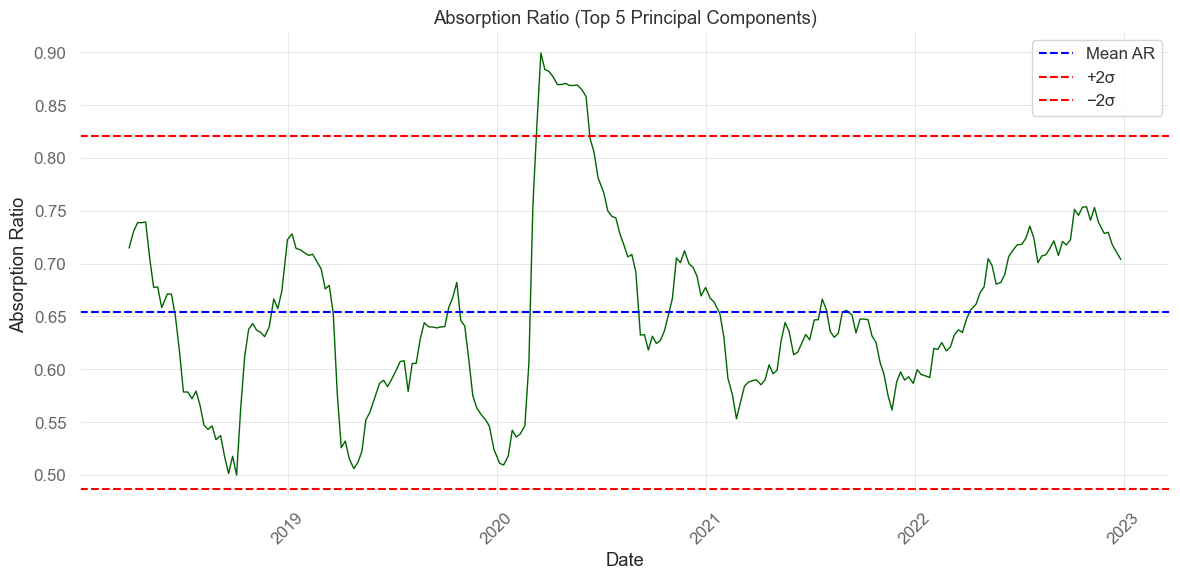

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Basic stats
mean_ar = absorp_ratio['AR'].mean()
std_ar = absorp_ratio['AR'].std()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=absorp_ratio, x='Date', y='AR', color='darkgreen', linewidth=1)

# Horizontal lines
plt.axhline(mean_ar, linestyle='--', color='blue', label='Mean AR')
plt.axhline(mean_ar + 2 * std_ar, linestyle='--', color='red', label='+2σ')
plt.axhline(mean_ar - 2 * std_ar, linestyle='--', color='red', label='−2σ')

# Labels and formatting
plt.title("Absorption Ratio (Top 5 Principal Components)")
plt.xlabel("Date")
plt.ylabel("Absorption Ratio")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()